In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val
from src.homps import homps
from src.hops import hops_trotter_simple
from src.hops import hops_rk_simple

In [3]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

Without noise:


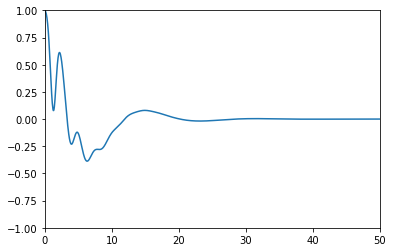

With noise:


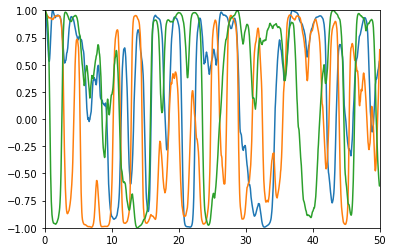

In [4]:
N_steps = 1000
N_trunc = 8

print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True, method='RK4')
for i in range(3):
    psis = hierarchy.compute_realizations(1)
    sigma_zs = compute_exp_val(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [5]:
N_steps = 1000
N_trunc = 16

In [6]:
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True, method='RK4')

In [7]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

detected keyboard interrupt. Returning 5 realizations!


In [8]:
sigma_zs_100 = compute_exp_val(psis_100, sigma_z)
#sigma_zs_1000 = compute_exp_val(psis_1000, sigma_z)

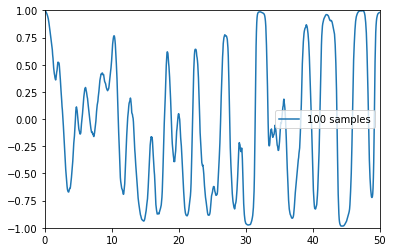

In [9]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
#plt.plot(np.linspace(0, duration, N_steps), sigma_zs_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Fine-tuned comparison

In [19]:
N_steps = 1000
N_trunc = 16
chimax = 10
epsilon = 0
N_krylov = 20

In [20]:
#hops = hops_rk_simple.HOPS_Simple_RK4(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=True)
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, N_krylov=N_krylov)
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, chimax=chimax, epsilon=epsilon, N_krylov=N_krylov, method='RK4')

In [21]:
# zts = hops.generator.sample_process()
zts = None

In [22]:
psis_hops = hops.compute_realizations(1, zts_debug=zts)
psis_homps = hierarchy.compute_realizations(1, zts_debug=zts, collect_debug_info=True)

t: 0.0 S: [0.99999695 0.00246826] norm: 1.002426568271231 maxS: 1.0 maxB: 0.9996889188541316
t: 0.05005005005005005 S: [0.99995381 0.00961095] norm: 1.0095877838760712 maxS: 1.0 maxB: 0.9987792760175256
t: 0.1001001001001001 S: [0.99978324 0.02082013] norm: 1.0217263991295236 maxS: 1.0 maxB: 0.9973385808682205
t: 0.15015015015015015 S: [0.99937747 0.0352799 ] norm: 1.0396755836117317 maxS: 1.0 maxB: 0.9954745310719064
t: 0.2002002002002002 S: [0.99864485 0.05204286] norm: 1.0650105034998296 maxS: 1.0 maxB: 0.9933359111314014
t: 0.2502502502502503 S: [0.99754303 0.07005646] norm: 1.1004090420320867 maxS: 1.0 maxB: 0.9911191920499836
t: 0.3003003003003003 S: [0.99610981 0.08812064] norm: 1.1504337362665558 maxS: 1.0 maxB: 0.9890803962184856
t: 0.3503503503503504 S: [0.99449832 0.10475257] norm: 1.2233206267400065 maxS: 1.0 maxB: 0.9875508911063385
t: 0.4004004004004004 S: [0.99302622 0.11789372] norm: 1.3354906869945393 maxS: 1.0 maxB: 0.9869530596522599
t: 0.45045045045045046 S: [0.9922

t: 4.1541541541541545 S: [0.74101164 0.67149219] norm: 1.310876353715574 maxS: 1.0 maxB: 0.6517338600119116
t: 4.2042042042042045 S: [0.74726023 0.66453152] norm: 1.3102479671621723 maxS: 1.0 maxB: 0.6997368764966609
t: 4.2542542542542545 S: [0.7506263  0.66072699] norm: 1.321081400788974 maxS: 1.0 maxB: 0.7143307968657838
t: 4.3043043043043046 S: [0.75165529 0.65955616] norm: 1.3374855128070908 maxS: 1.0 maxB: 0.7168134090386798
t: 4.354354354354355 S: [0.75205468 0.65910072] norm: 1.3541274001145966 maxS: 1.0 maxB: 0.7151645711716453
t: 4.404404404404405 S: [0.75312177 0.65788115] norm: 1.3668341942265032 maxS: 1.0 maxB: 0.7141613493928644
t: 4.454454454454455 S: [0.75555785 0.65508193] norm: 1.3727664242875481 maxS: 1.0 maxB: 0.7167650280985698
t: 4.504504504504505 S: [0.75969033 0.65028502] norm: 1.3703315199398185 maxS: 1.0 maxB: 0.7238928810175512
t: 4.554554554554555 S: [0.76566912 0.64323464] norm: 1.3589810733279362 maxS: 1.0 maxB: 0.7348145278750475
t: 4.604604604604605 S: [0

t: 10.31031031031031 S: [0.81315749 0.58204373] norm: 0.26126854549542367 maxS: 1.0 maxB: 0.7879899017716787
t: 10.36036036036036 S: [0.80750192 0.58986494] norm: 0.259053983228356 maxS: 1.0 maxB: 0.7790609175167114
t: 10.41041041041041 S: [0.80181058 0.59757827] norm: 0.25680977118755094 maxS: 1.0 maxB: 0.7693393705485508
t: 10.46046046046046 S: [0.79617782 0.60506271] norm: 0.25454052607006394 maxS: 1.0 maxB: 0.7587450916762652
t: 10.51051051051051 S: [0.79070177 0.61220153] norm: 0.25225106028966504 maxS: 1.0 maxB: 0.7471694815992468
t: 10.56056056056056 S: [0.78548246 0.61888392] norm: 0.24994634979069888 maxS: 1.0 maxB: 0.7344788308875664
t: 10.61061061061061 S: [0.78061871 0.62500755] norm: 0.24763149337233012 maxS: 1.0 maxB: 0.7205269165230876
t: 10.66066066066066 S: [0.77620344 0.63048253] norm: 0.24531166308396232 maxS: 1.0 maxB: 0.7051815301866533
t: 10.710710710710712 S: [0.77231734 0.63523691] norm: 0.24299204639617686 maxS: 1.0 maxB: 0.6883676367391769
t: 10.76076076076076

t: 16.516516516516518 S: [0.77769259 0.62864476] norm: 0.09568509310893034 maxS: 1.0 maxB: 0.7029283568675535
t: 16.566566566566568 S: [0.77720673 0.62924534] norm: 0.09493907668314354 maxS: 1.0 maxB: 0.7009841185589126
t: 16.616616616616618 S: [0.77671193 0.629856  ] norm: 0.0941987489493328 maxS: 1.0 maxB: 0.6989512534978736
t: 16.666666666666668 S: [0.77621193 0.63047207] norm: 0.09346410899179909 maxS: 1.0 maxB: 0.6968395943757939
t: 16.716716716716718 S: [0.77571032 0.63108913] norm: 0.09273515408020508 maxS: 1.0 maxB: 0.6946595047495874
t: 16.766766766766768 S: [0.77521048 0.63170303] norm: 0.09201187928596247 maxS: 1.0 maxB: 0.6924217575433855
t: 16.816816816816818 S: [0.77471552 0.63230994] norm: 0.09129427716031327 maxS: 1.0 maxB: 0.6901373987749796
t: 16.866866866866868 S: [0.7742283  0.63290643] norm: 0.09058233747322306 maxS: 1.0 maxB: 0.6878175973445285
t: 16.916916916916918 S: [0.7737513  0.63348948] norm: 0.08987604701158708 maxS: 1.0 maxB: 0.6854734827532585
t: 16.96696

t: 22.822822822822825 S: [0.76377904 0.64547779] norm: 0.035902747819471656 maxS: 1.0 maxB: 0.596567451667176
t: 22.872872872872875 S: [0.76378175 0.64547459] norm: 0.03562502403174128 maxS: 1.0 maxB: 0.5966153990038899
t: 22.922922922922925 S: [0.76378307 0.64547302] norm: 0.035349452007277564 maxS: 1.0 maxB: 0.5966357586560332
t: 22.972972972972975 S: [0.7637831  0.64547298] norm: 0.03507601520416255 maxS: 1.0 maxB: 0.5966300785041404
t: 23.023023023023026 S: [0.76378191 0.6454744 ] norm: 0.03480469718216871 maxS: 1.0 maxB: 0.5965998729678788
t: 23.073073073073076 S: [0.76377956 0.64547717] norm: 0.03453548160212452 maxS: 1.0 maxB: 0.5965466078300407
t: 23.123123123123126 S: [0.76377614 0.64548122] norm: 0.03426835222562786 maxS: 1.0 maxB: 0.5964716864139067
t: 23.173173173173176 S: [0.76377171 0.64548646] norm: 0.0340032929150702 maxS: 1.0 maxB: 0.5963764372640874
t: 23.223223223223226 S: [0.76376635 0.64549281] norm: 0.03374028763393112 maxS: 1.0 maxB: 0.5962621034544766
t: 23.2732

t: 28.97897897897898 S: [0.76246539 0.647029  ] norm: 0.013818971605577534 maxS: 1.0 maxB: 0.5818176096685513
t: 29.02902902902903 S: [0.76246695 0.64702716] norm: 0.013712136551078618 maxS: 1.0 maxB: 0.5818131174866071
t: 29.07907907907908 S: [0.76246857 0.64702526] norm: 0.01360612757026007 maxS: 1.0 maxB: 0.5818084364028251
t: 29.12912912912913 S: [0.76247024 0.64702328] norm: 0.013500938273342077 maxS: 1.0 maxB: 0.5818035889195744
t: 29.17917917917918 S: [0.76247196 0.64702126] norm: 0.013396562319842159 maxS: 1.0 maxB: 0.5817985966197251
t: 29.22922922922923 S: [0.76247372 0.64701919] norm: 0.013292993418202597 maxS: 1.0 maxB: 0.5817934801860266
t: 29.27927927927928 S: [0.76247551 0.64701707] norm: 0.013190225325425766 maxS: 1.0 maxB: 0.5817882594262683
t: 29.32932932932933 S: [0.76247733 0.64701493] norm: 0.013088251846715594 maxS: 1.0 maxB: 0.5817829533030774
t: 29.37937937937938 S: [0.76247917 0.64701276] norm: 0.012987066835120952 maxS: 1.0 maxB: 0.5817775799672642
t: 29.42942

t: 34.83483483483484 S: [0.7624665  0.64702769] norm: 0.005573533319578812 maxS: 1.0 maxB: 0.5818304026665198
t: 34.88488488488489 S: [0.76246588 0.64702843] norm: 0.005530446462941362 maxS: 1.0 maxB: 0.5818323473495947
t: 34.93493493493494 S: [0.76246527 0.64702914] norm: 0.005487692700155706 maxS: 1.0 maxB: 0.5818342206541128
t: 34.98498498498499 S: [0.7624647  0.64702982] norm: 0.005445269456016466 maxS: 1.0 maxB: 0.581836022850257
t: 35.03503503503504 S: [0.76246414 0.64703047] norm: 0.005403174175230378 maxS: 1.0 maxB: 0.5818377543094626
t: 35.08508508508509 S: [0.76246361 0.6470311 ] norm: 0.005361404322261456 maxS: 1.0 maxB: 0.5818394154992451
t: 35.13513513513514 S: [0.7624631 0.6470317] norm: 0.005319957381177352 maxS: 1.0 maxB: 0.5818410069780672
t: 35.18518518518519 S: [0.76246261 0.64703228] norm: 0.005278830855497709 maxS: 1.0 maxB: 0.5818425293902224
t: 35.23523523523524 S: [0.76246214 0.64703283] norm: 0.005238022268044652 maxS: 1.0 maxB: 0.5818439834607763
t: 35.2852852

t: 40.34034034034034 S: [0.76246001 0.64703534] norm: 0.0023734886986737087 maxS: 1.0 maxB: 0.5818519169393149
t: 40.390390390390394 S: [0.76245997 0.64703539] norm: 0.002355140284133535 maxS: 1.0 maxB: 0.5818520400238028
t: 40.44044044044044 S: [0.76245993 0.64703543] norm: 0.00233693371359134 maxS: 1.0 maxB: 0.5818521690530192
t: 40.490490490490494 S: [0.76245989 0.64703548] norm: 0.002318867890501431 maxS: 1.0 maxB: 0.5818523037278548
t: 40.54054054054054 S: [0.76245985 0.64703553] norm: 0.00230094172679521 maxS: 1.0 maxB: 0.5818524437475945
t: 40.590590590590594 S: [0.7624598  0.64703559] norm: 0.002283154142815612 maxS: 1.0 maxB: 0.5818525888105767
t: 40.64064064064064 S: [0.76245975 0.64703564] norm: 0.0022655040672521476 maxS: 1.0 maxB: 0.5818527386148075
t: 40.690690690690694 S: [0.76245971 0.6470357 ] norm: 0.0022479904370765673 maxS: 1.0 maxB: 0.5818528928585378
t: 40.74074074074074 S: [0.76245966 0.64703576] norm: 0.0022306121974789775 maxS: 1.0 maxB: 0.5818530512408319
t: 4

t: 46.04604604604605 S: [0.76245676 0.64703917] norm: 0.0009798582768609113 maxS: 1.0 maxB: 0.5818621273350659
t: 46.0960960960961 S: [0.76245677 0.64703916] norm: 0.0009722834233008805 maxS: 1.0 maxB: 0.5818621124179542
t: 46.14614614614615 S: [0.76245677 0.64703916] norm: 0.0009647671276217481 maxS: 1.0 maxB: 0.5818620975034785
t: 46.1961961961962 S: [0.76245678 0.64703915] norm: 0.0009573089371375361 maxS: 1.0 maxB: 0.5818620826350426
t: 46.24624624624625 S: [0.76245678 0.64703914] norm: 0.0009499084026619424 maxS: 1.0 maxB: 0.5818620678540691
t: 46.2962962962963 S: [0.76245679 0.64703914] norm: 0.0009425650784813109 maxS: 1.0 maxB: 0.5818620531999961
t: 46.34634634634635 S: [0.76245679 0.64703913] norm: 0.0009352785223277062 maxS: 1.0 maxB: 0.5818620387103242
t: 46.3963963963964 S: [0.7624568  0.64703913] norm: 0.0009280482953521076 maxS: 1.0 maxB: 0.5818620244206971
t: 46.44644644644645 S: [0.7624568  0.64703912] norm: 0.0009208739620978181 maxS: 1.0 maxB: 0.5818620103649627
t: 46

In [23]:
sigma_zs_hops = compute_exp_val(psis_hops, sigma_z)
sigma_zs_homps = compute_exp_val(psis_homps, sigma_z)

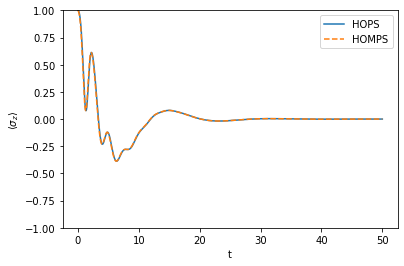

In [24]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_hops, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_homps, "--", label="HOMPS")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.ylim(-1, 1)
plt.show()

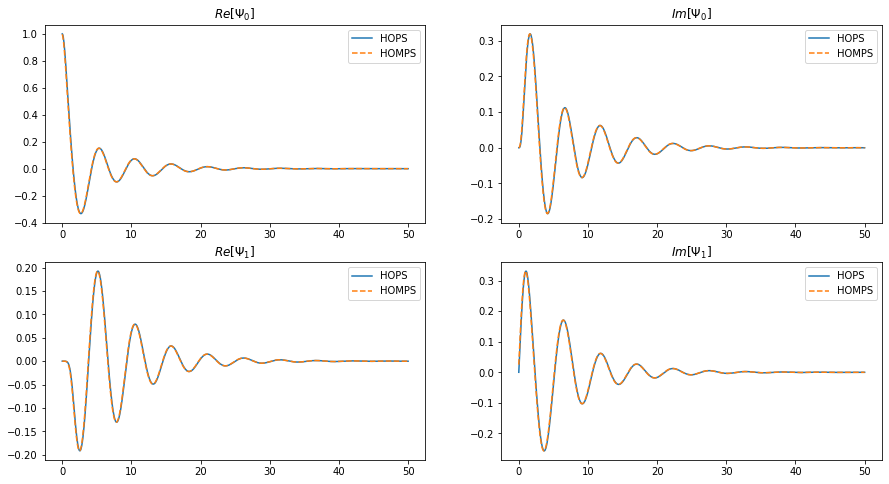

In [25]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))

axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_hops[0, :, 0]), label="HOPS")
axarray[0][0].plot(np.linspace(0, duration, N_steps), np.real(psis_homps[0, :, 0]), "--", label="HOMPS")
axarray[0][0].legend()
axarray[0][0].set_title(r"$Re\left[\Psi_0\right]$")

axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_hops[0, :, 0]), label="HOPS")
axarray[0][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_homps[0, :, 0]), "--", label="HOMPS")
axarray[0][1].legend()
axarray[0][1].set_title(r"$Im\left[\Psi_0\right]$")

axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_hops[0, :, 1]), label="HOPS")
axarray[1][0].plot(np.linspace(0, duration, N_steps), np.real(psis_homps[0, :, 1]), "--", label="HOMPS")
axarray[1][0].legend()
axarray[1][0].set_title(r"$Re\left[\Psi_1\right]$")

axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_hops[0, :, 1]), label="HOPS")
axarray[1][1].plot(np.linspace(0, duration, N_steps), np.imag(psis_homps[0, :, 1]), "--", label="HOMPS")
axarray[1][1].legend()
axarray[1][1].set_title(r"$Im\left[\Psi_1\right]$")

plt.show()

# Sanity check: does the norm of HOPS just grow exponentially?

In [88]:
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False, N_krylov=N_krylov)

In [89]:
psis_hops = hops.compute_realizations(1, zts_debug=zts)

norm: 1.002426617714978
norm: 1.0095879886558226
norm: 1.021726726957115
norm: 1.039675588030496
norm: 1.065008398274102
norm: 1.1003984323072973
norm: 1.1503909324547974
norm: 1.2231553320140505
norm: 1.3349821095289958
norm: 1.5244107316052082
norm: 1.9119723942764846
norm: 3.0121697435022603
norm: 6.954803608095168
norm: 20.190933788454643
norm: 58.85875319933319
norm: 158.28833844011712
norm: 384.62717104402446
norm: 842.6032016078093
norm: 1669.737452792546
norm: 3007.973322553211
norm: 4952.047905117163
norm: 7488.170516706964
norm: 10449.00984101077
norm: 13512.138107348694
norm: 16254.690868310812
norm: 18252.528747033815
norm: 19190.460843919354
norm: 18943.33198021305
norm: 17599.764687401865
norm: 15424.331249759274
norm: 12777.363857798167
norm: 10023.840646212766
norm: 7460.4332311905055
norm: 5277.022442360792
norm: 3553.622911595574
norm: 2282.4865124127537
norm: 1401.0941208209824
norm: 823.8210182691595
norm: 465.2293003372126
norm: 253.16673214960122
norm: 133.3564324

norm: 0.09186310716094631
norm: 0.09114746768825724
norm: 0.09043788238473613
norm: 0.08973428985082733
norm: 0.08903662494994809
norm: 0.08834481932545629
norm: 0.08765880201585835
norm: 0.08697850003331131
norm: 0.08630383880149661
norm: 0.08563474280115582
norm: 0.0849711361438986
norm: 0.0843129428408037
norm: 0.08366008727801226
norm: 0.08301249481070426
norm: 0.08237009201881493
norm: 0.08173280690868992
norm: 0.08110056931921679
norm: 0.080473311228045
norm: 0.07985096689357007
norm: 0.0792334729630204
norm: 0.07862076858484654
norm: 0.0780127956494142
norm: 0.07740949887310211
norm: 0.07681082555902752
norm: 0.07621672564736078
norm: 0.07562715196761781
norm: 0.07504206000916917
norm: 0.0744614076167555
norm: 0.07388515508186906
norm: 0.07331326512016607
norm: 0.07274570257443516
norm: 0.0721824342550072
norm: 0.07162342882017139
norm: 0.07106865655167949
norm: 0.07051808926272271
norm: 0.0699717001601425
norm: 0.06942946351305208
norm: 0.06889135447537863
norm: 0.0683573490593

norm: 0.007653342960177827
norm: 0.007594177444036804
norm: 0.007535469335346222
norm: 0.007477215091749628
norm: 0.007419411201243479
norm: 0.007362054189975777
norm: 0.007305140605398021
norm: 0.007248667009998623
norm: 0.0071926300003414285
norm: 0.007137026209774969
norm: 0.007081852289345248
norm: 0.007027104907780092
norm: 0.0069727807677225934
norm: 0.006918876602173383
norm: 0.006865389164339458
norm: 0.006812315229599151
norm: 0.006759651598588781
norm: 0.006707395100753297
norm: 0.006655542593044501
norm: 0.006604090950040488
norm: 0.006553037066792252
norm: 0.006502377871227497
norm: 0.006452110317474273
norm: 0.006402231373387309
norm: 0.00635273802968943
norm: 0.006303627310370454
norm: 0.006254896260942619
norm: 0.006206541940420457
norm: 0.0061585614345915874
norm: 0.006110951858455541
norm: 0.00606371034279094
norm: 0.006016834038560573
norm: 0.005970320126620971
norm: 0.005924165807032705
norm: 0.005878368294330372
norm: 0.0058329248287458295
norm: 0.005787832676724306

norm: 0.0007065454531085166
norm: 0.0007010834587523652
norm: 0.0006956636886405659
norm: 0.0006902858162211269
norm: 0.0006849495177896191
norm: 0.0006796544721063266
norm: 0.0006744003600729571
norm: 0.0006691868651830018
norm: 0.0006640136737055981
norm: 0.0006588804739809989
norm: 0.0006537869565556514
norm: 0.0006487328149077998
norm: 0.000643717744816453
norm: 0.0006387414439609187
norm: 0.0006338036126490678
norm: 0.0006289039536929191
norm: 0.0006240421718482662
norm: 0.0006192179741144596
norm: 0.0006144310702470664
norm: 0.00060968117211839
norm: 0.0006049679931334615
norm: 0.0006002912495025367
norm: 0.0005956506601187912
norm: 0.0005910459450437411


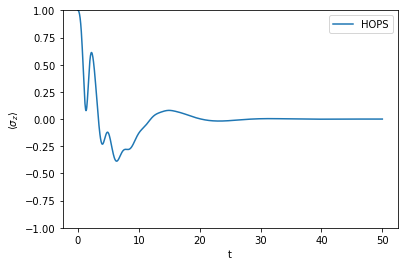

In [87]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_hops, label="HOPS")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.ylim(-1, 1)
plt.show()